In [1]:
#Import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from xgboost import XGBRegressor

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Datasets are being loaded in Train and Test. And combining them into a single dataset

In [3]:
pd.set_option('display.max_columns', None) # Show all columns of the dataset
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

train['HasPrice'] = 1
test['HasPrice'] = 0

df = pd.concat([train,test])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,L

In [4]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Plotting a heatmap to see if there is any correlation between the columns

<AxesSubplot:>

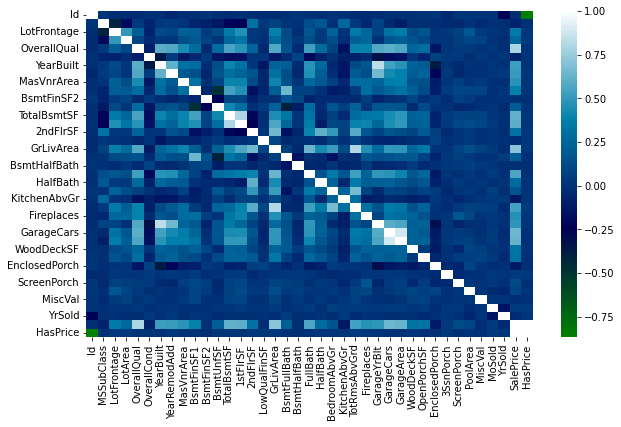

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='ocean')

In [7]:
df.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HasPrice    

We can see that the highest correlations with SalePrice are GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotalRmsAbvGrd, YearBuilt, and YearRemodAdd.

To visualize the sata, I will plot the counts on some categories using Seaborn's countplot.

In [8]:
sns.set_style('darkgrid')

Text(0, 0.5, 'Count')

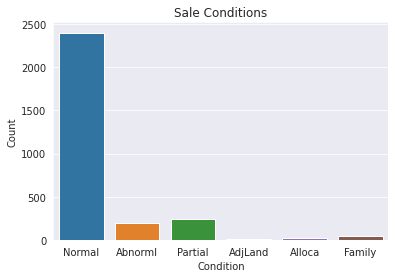

In [9]:
sns.countplot(x='SaleCondition',data=df)
plt.title('Sale Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

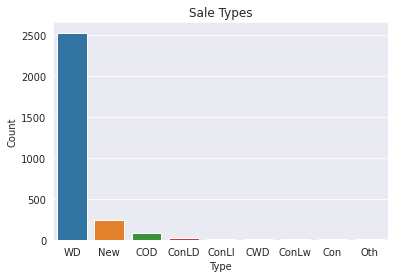

In [10]:
sns.countplot(x='SaleType',data=df)
plt.title('Sale Types')
plt.xlabel('Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

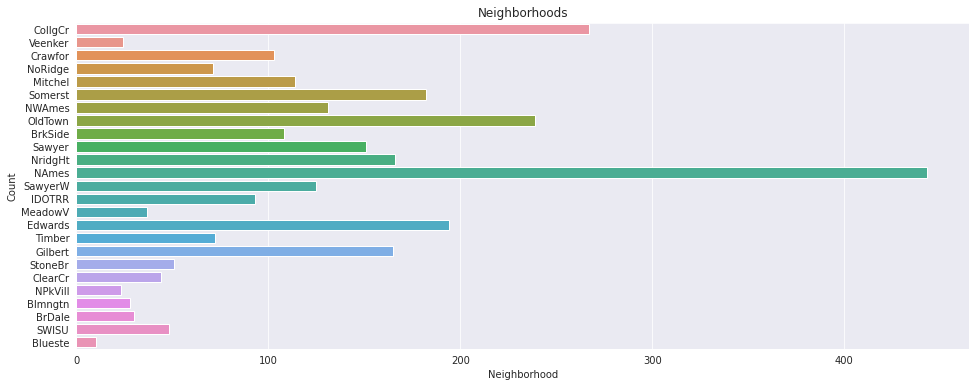

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(y='Neighborhood',data=df)
plt.title('Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

In terms of housing, it can be concluded that North Ames is the largest neighborhood, and College Creek is the second largest.

Text(0, 0.5, 'Count')

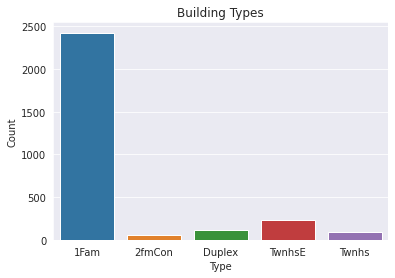

In [12]:
sns.countplot(x='BldgType',data=df)
plt.title('Building Types')
plt.xlabel('Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

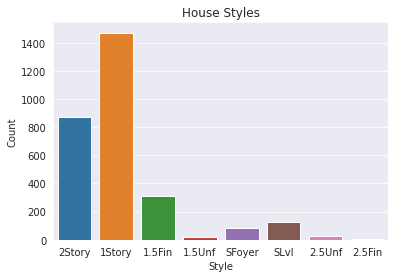

In [13]:
sns.countplot(x='HouseStyle',data=df)
plt.title('House Styles')
plt.xlabel('Style')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

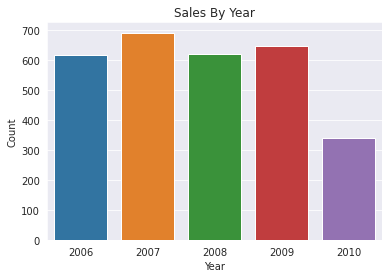

In [14]:
sns.countplot(x='YrSold',data=df)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Count')

The years with the most purchases were 2007-2009

Text(0, 0.5, 'Count')

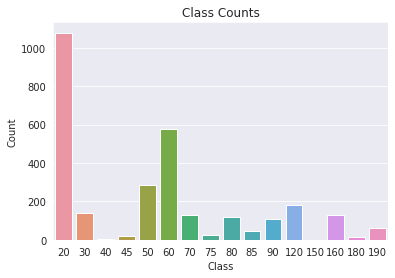

In [15]:
sns.countplot(x='MSSubClass',data=df)
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')

This is a data visualization of the median house price in each decade beginning in the 1880s.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


[Text(0, 50000.0, '50K'),
 Text(0, 100000.0, '100K'),
 Text(0, 150000.0, '150K'),
 Text(0, 200000.0, '200K'),
 Text(0, 250000.0, '250K'),
 Text(0, 300000.0, '300K'),
 Text(0, 350000.0, '350K'),
 Text(0, 400000.0, '400K'),
 Text(0, 450000.0, '450K')]

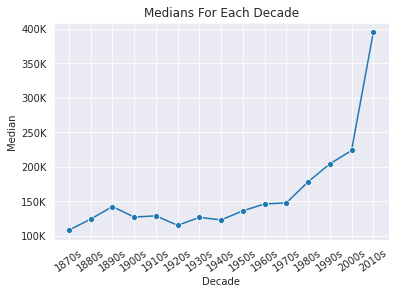

In [16]:
#Transform years into decades
def get_decade_median(min,max):
    return df.SalePrice[(df.YearBuilt >= min) & (df.YearBuilt < max)].median()

#This list will be used to obtain the median housing price for each decade
decade = [str(i) + 's' for i in range(min(df.YearBuilt)-2,2020,10)]
med = [get_decade_median(i,i+10) for i in range(min(df.YearBuilt)-2,2020,10)]
medians = pd.DataFrame({'Decade' : decade,'Median' : med})

medplot = sns.lineplot(x='Decade', y='Median', data=medians, marker='o')
plt.title('Medians For Each Decade')
plt.draw()
plt.xticks(rotation=35)

new_ticks = [str(int(x//1000)) + 'K' for x in medplot.axes.get_yticks()]
medplot.axes.set_yticklabels(new_ticks)

We can see from this graph that prices began to rise in the 1970s and gradually increased until the 2000s. By 2010, the prices had more than doubled

In [17]:
medians

,Decade,Median
0,1870s,108000.0
1,1880s,124000.0
2,1890s,142200.0
3,1900s,127000.0
4,1910s,128750.0
5,1920s,115000.0
6,1930s,126500.0
7,1940s,122900.0
8,1950s,136000.0
9,1960s,146000.0


Text(69.0, 0.5, 'Month')

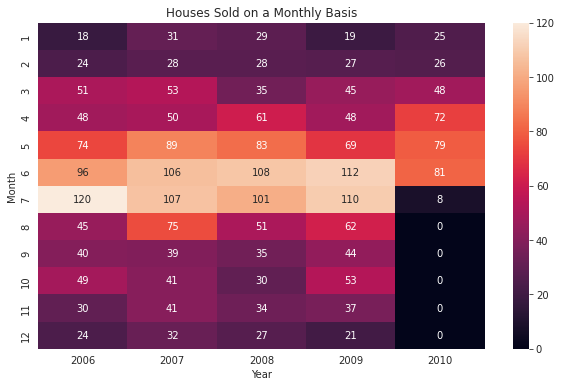

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df.MoSold,df.YrSold), annot=True, fmt='g')
plt.title('Houses Sold on a Monthly Basis')
plt.xlabel('Year')
plt.ylabel('Month')

Text(0, 0.5, 'Count')

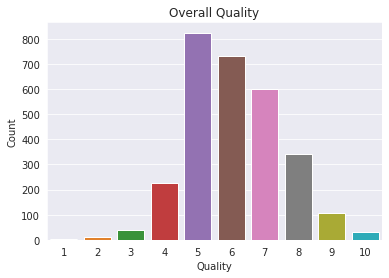

In [19]:
sns.countplot(x='OverallQual',data=df)
plt.title('Overall Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

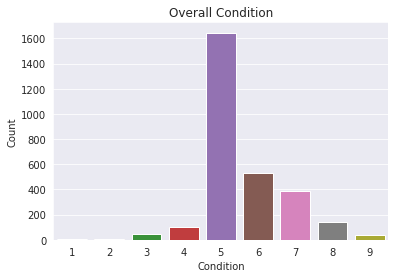

In [20]:
sns.countplot(x='OverallCond',data=df)
plt.title('Overall Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

The houses were rated average in terms of both quality and condition based on both graphs of overall quality and condition

Text(69.0, 0.5, 'Condition')

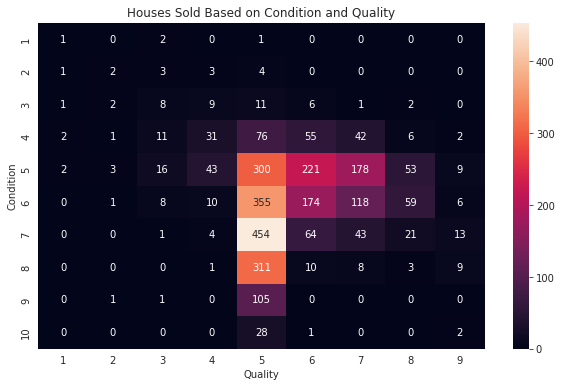

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df.OverallQual,df.OverallCond), annot=True, fmt='g')
plt.title('Houses Sold Based on Condition and Quality')
plt.xlabel('Quality')
plt.ylabel('Condition')

Text(69.0, 0.5, 'Condition')

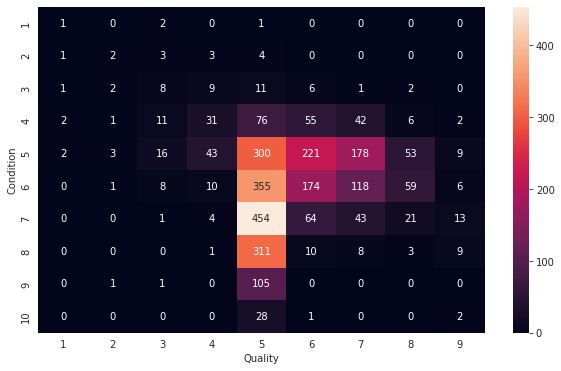

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df.OverallQual,df.OverallCond), annot=True, fmt='g')
plt.xlabel('Quality')
plt.ylabel('Condition')

Text(0.5, 0, 'Price')

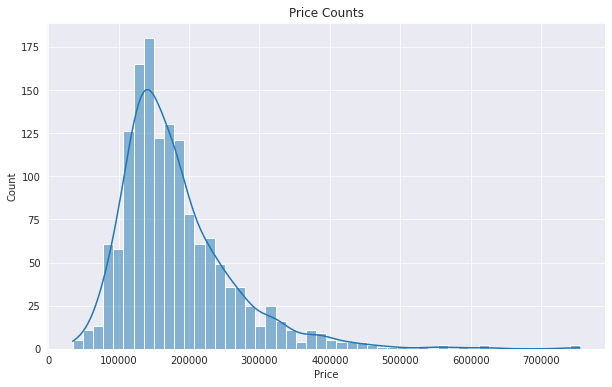

In [23]:
plt.figure(figsize=(10,6))
s = sns.histplot(df.SalePrice, kde=True, bins=50)
plt.title('Price Counts')
plt.xlabel('Price')

# new_ticks = [str(int(x//1000)) + 'K' for x in s.axes.get_xticks()]
# new_ticks[1] = 0
# s.axes.set_xticklabels(new_ticks)

Text(0.5, 0, 'Area')

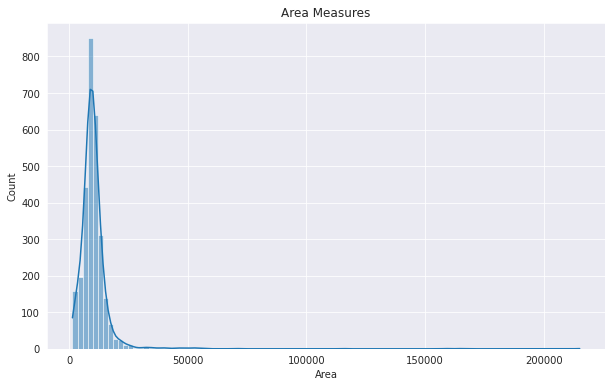

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df.LotArea, kde=True, bins=100)
plt.title('Area Measures')
plt.xlabel('Area')

In [25]:
print(f'Amount of houses w/ less than 25k sq. ft: {(len(df[df.LotArea < 25000]) * 100) / len(df)}%')
print(f'Amount of houses w/ more than 25k sq. ft: {(len(df[df.LotArea > 25000]) * 100) / len(df)}%')

Amount of houses w/ less than 25k sq. ft: 98.32134292565948%
Amount of houses w/ more than 25k sq. ft: 1.644398766700925%


Text(0.5, 0, 'Area Abv. Ground')

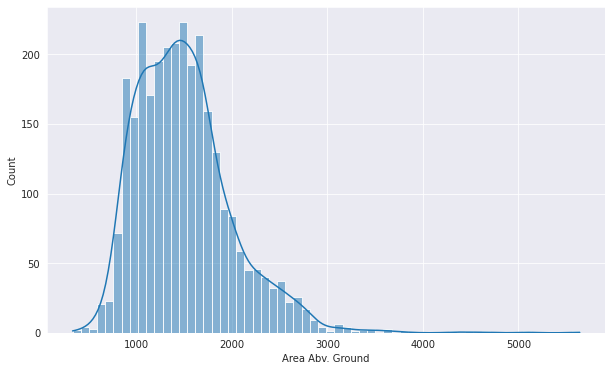

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df.GrLivArea, kde=True)
plt.xlabel('Area Abv. Ground')

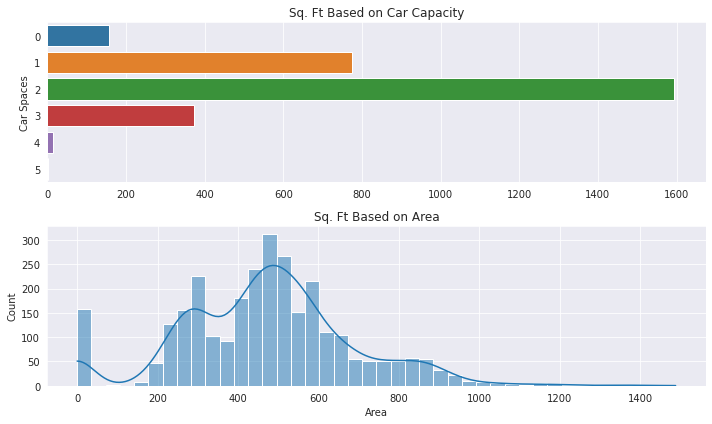

In [27]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,6))

sns.countplot(y='GarageCars', data=df, ax=ax1)
ax1.set_title('Sq. Ft Based on Car Capacity')
ax1.set_xlabel('')
ax1.set_yticklabels([int(t) for t in ax1.axes.get_yticks()])
ax1.set_ylabel('Car Spaces')

sns.histplot(df.GarageArea, kde=True, ax=ax2)
ax2.set_title('Sq. Ft Based on Area')
ax2.set_xlabel('Area')

fig.tight_layout()

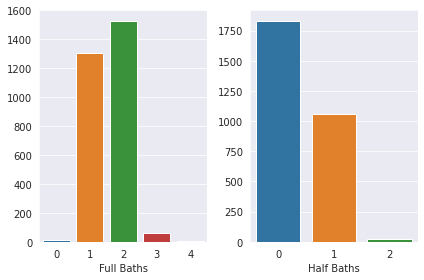

In [28]:
fig, ax = plt.subplots(1,2)
cols_to_be_plotted = ['FullBath','HalfBath']
xlabs = ['Full Baths', 'Half Baths']
for i in range(len(cols_to_be_plotted)):
    sns.countplot(x=cols_to_be_plotted[i], data=df, ax=ax[i])
    ax[i].set_xlabel(xlabs[i])
    ax[i].set_ylabel('')

fig.tight_layout()

<AxesSubplot:xlabel='FullBath', ylabel='HalfBath'>

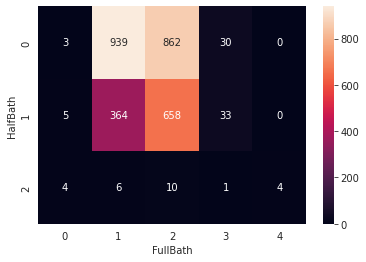

In [29]:
sns.heatmap(pd.crosstab(df.HalfBath,df.FullBath), annot=True, fmt='g')

Text(0, 0.5, '')

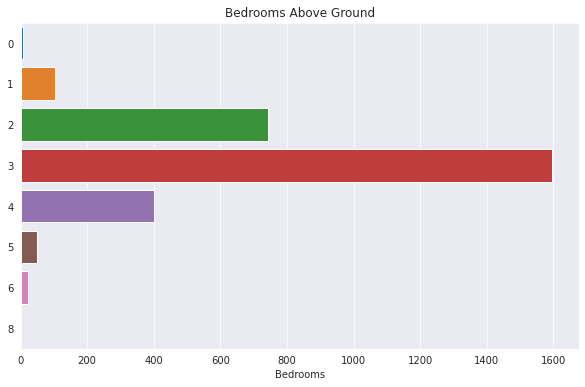

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y='BedroomAbvGr',data=df)
plt.title('Bedrooms Above Ground')
plt.xlabel('Bedrooms')
plt.ylabel('')

Text(0, 0.5, '')

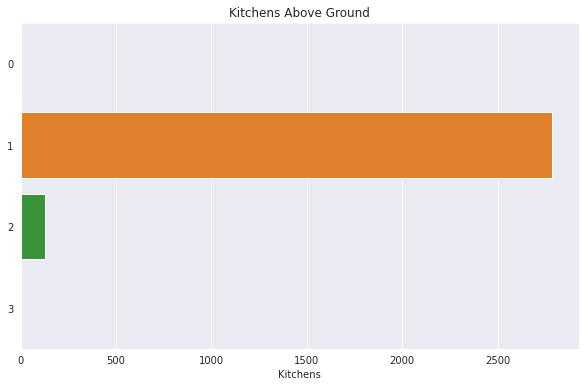

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y='KitchenAbvGr',data=df)
plt.title('Kitchens Above Ground')
plt.xlabel('Kitchens')
plt.ylabel('')

Text(0, 0.5, '')

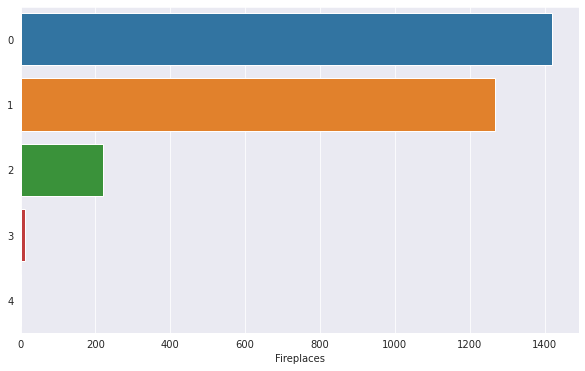

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y='Fireplaces',data=df)
plt.xlabel('Fireplaces')
plt.ylabel('')

Text(0, 0.5, '')

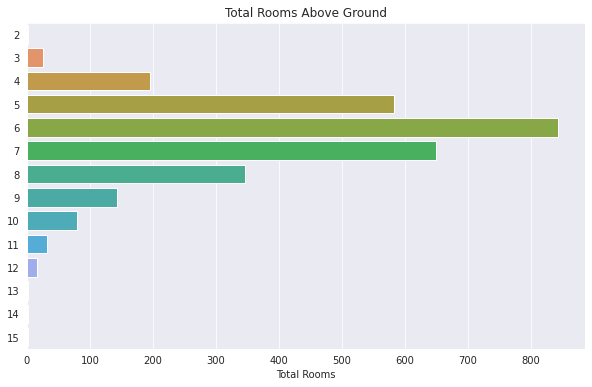

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y='TotRmsAbvGrd',data=df)
plt.title('Total Rooms Above Ground')
plt.xlabel('Total Rooms')
plt.ylabel('')

Text(0.5, 0.98, 'Relation of Quality/Condition to Price')

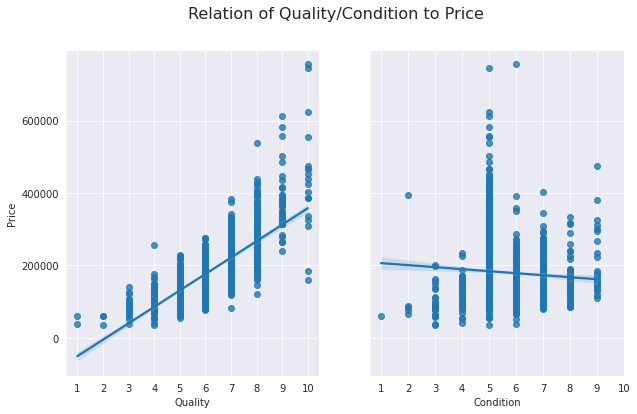

In [34]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,6), sharey=True)

sns.regplot(x='OverallQual', y='SalePrice', data=df, ax=ax1)
ax1.set_xlabel('Quality')
ax1.set_xticks(np.arange(10)+1)
ax1.set_ylabel('Price')

sns.regplot(x='OverallCond', y='SalePrice', data=df, ax=ax2)
ax2.set_xlabel('Condition')
ax2.set_xticks(np.arange(10)+1)
ax2.set_ylabel('')

plt.suptitle('Relation of Quality/Condition to Price', fontsize=16)

In [35]:
def boxplot(col, type_, xlab, rotation=0):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y=df.SalePrice, data=df)
    plt.title('Quantiles of ' + type_)
    plt.xlabel(xlab)
    plt.xticks(rotation=rotation)
    plt.ylabel('Price')

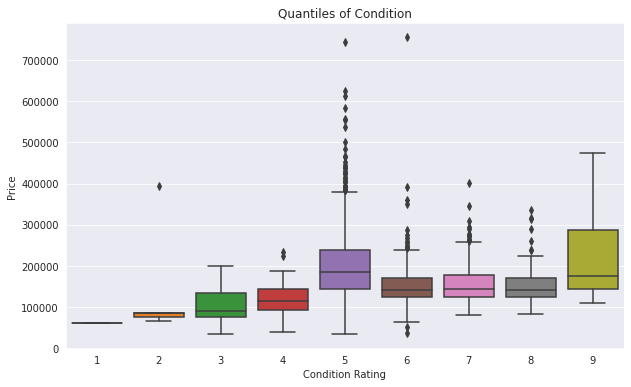

In [36]:
#Change to regression plot
boxplot('OverallCond','Condition','Condition Rating')

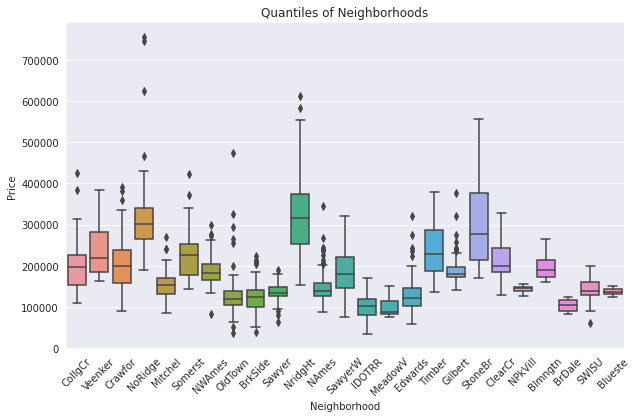

In [37]:
boxplot('Neighborhood','Neighborhoods','Neighborhood',rotation=45)

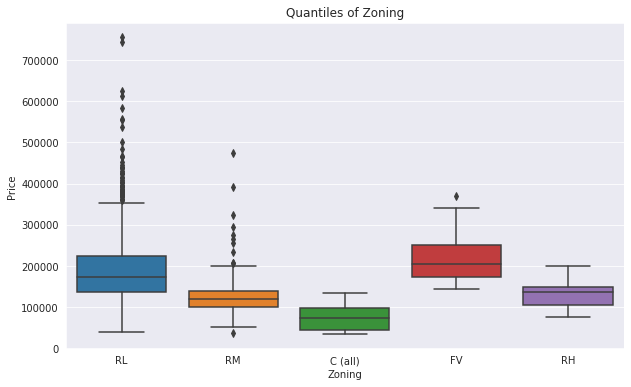

In [38]:
boxplot('MSZoning','Zoning','Zoning')

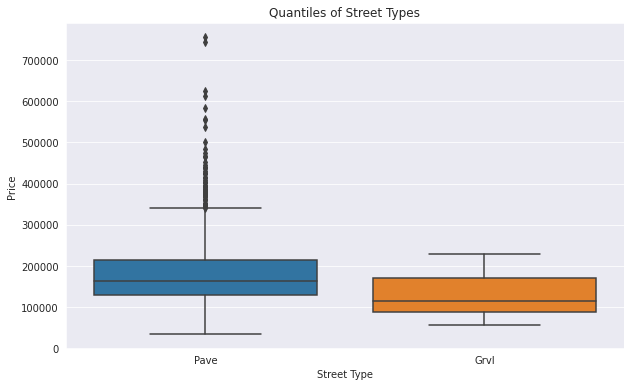

In [39]:
boxplot('Street','Street Types','Street Type')

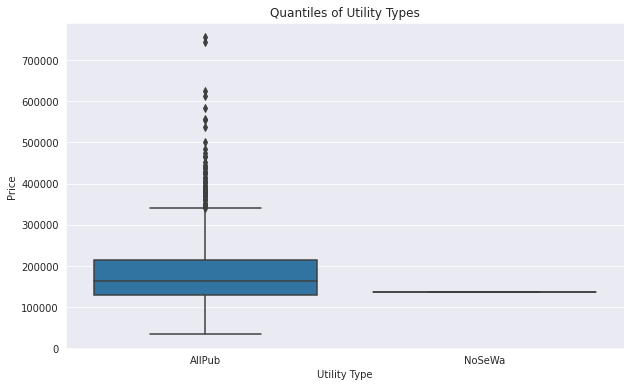

In [40]:
boxplot('Utilities','Utility Types','Utility Type')

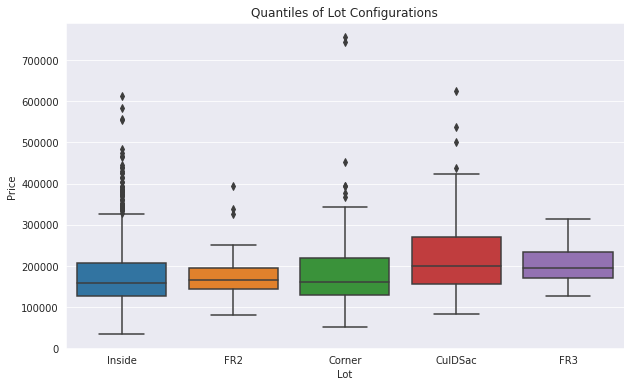

In [41]:
boxplot('LotConfig','Lot Configurations','Lot')

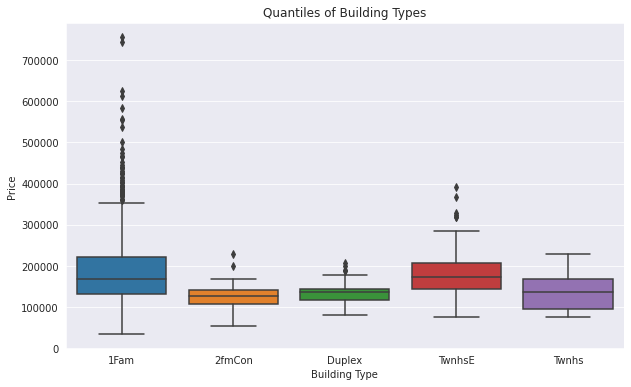

In [42]:
boxplot('BldgType','Building Types','Building Type')

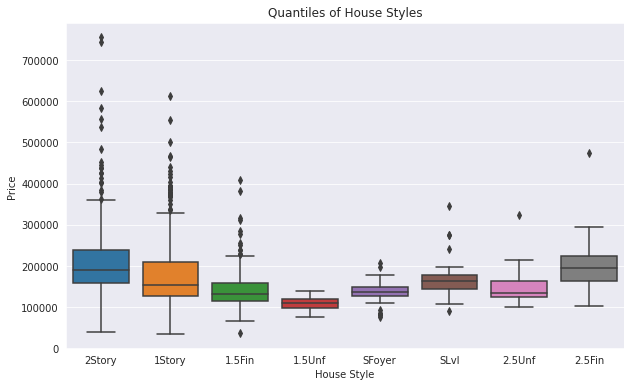

In [43]:
boxplot('HouseStyle','House Styles','House Style')

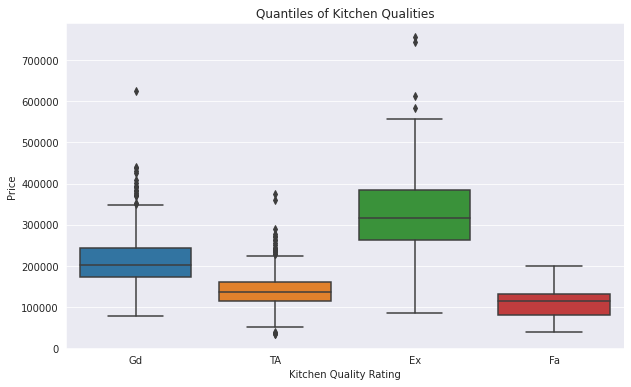

In [44]:
boxplot('KitchenQual','Kitchen Qualities','Kitchen Quality Rating')

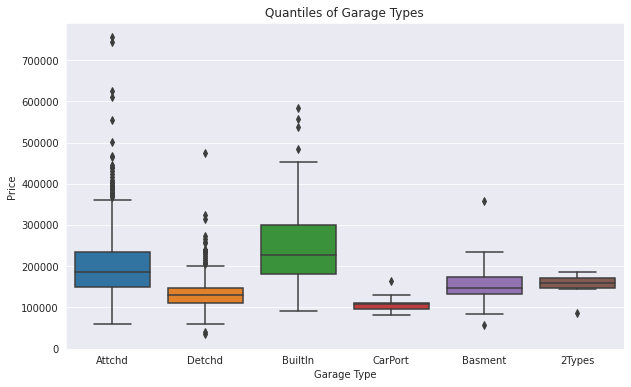

In [45]:
boxplot('GarageType','Garage Types','Garage Type')

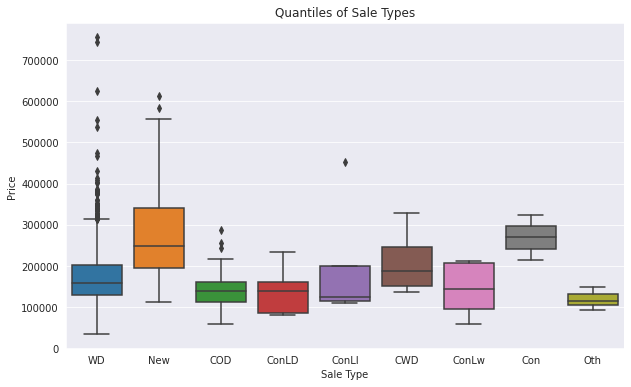

In [46]:
boxplot('SaleType','Sale Types','Sale Type')

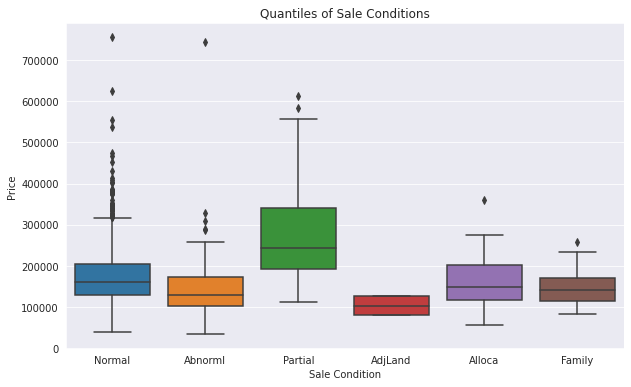

In [47]:
boxplot('SaleCondition','Sale Conditions','Sale Condition')

In [48]:
#Get the sum and the rate of missing values in each column
amt_of_null_vals = pd.Series([df[col].isnull().sum() for col in df.columns], index=df.columns)
percentages = pd.Series([df[col].isnull().sum() / len(df) for col in train.columns], index=df.columns)
null_vals = pd.DataFrame({'missing_values': amt_of_null_vals, 'percentage': np.round(percentages,4)})
null_vals.sort_values(['missing_values'],ascending=False).head(20)

,missing_values,percentage
PoolQC,2909,0.9966
MiscFeature,2814,0.9640
Alley,2721,0.9322
Fence,2348,0.8044
SalePrice,1459,0.4998
FireplaceQu,1420,0.4865
LotFrontage,486,0.1665
GarageYrBlt,159,0.0545
GarageQual,159,0.0545
GarageFinish,159,0.0545


<AxesSubplot:>

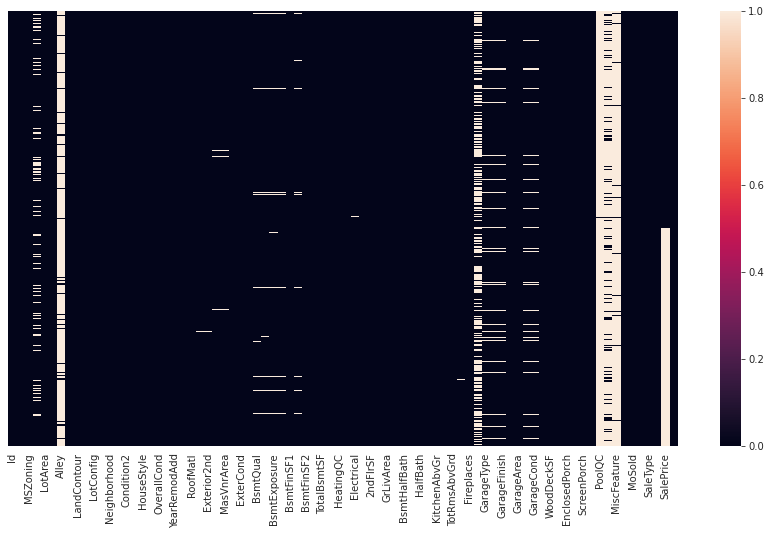

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False)

In [50]:
for name in df.select_dtypes('number'):
    df[name].fillna(0, inplace=True)
for name in df.select_dtypes('object'):
    df[name].fillna('None', inplace=True)

In [51]:
pd.Series([df[col].isnull().sum() for col in df.columns], index=df.columns).sort_values(ascending=False).head(20)

Id              0
GarageCars      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

In [52]:
#Separate the target variable from the data
X = df.copy()
y = X.pop('SalePrice')

#Create Mutual Information
def mi_scores(X, y):
    for col in X.select_dtypes("object",'category'):
        X[col], _ = X[col].factorize()
    
    scores = mutual_info_regression(X, y)
    scores = pd.Series(scores, name='MI Scores', index=X.columns).sort_values(ascending=False)
    return scores

scores = mi_scores(X, y)
scores[:20]

Id              0.677354
HasPrice        0.660347
OverallQual     0.277402
GrLivArea       0.252404
Neighborhood    0.248506
TotalBsmtSF     0.197075
GarageCars      0.191580
GarageArea      0.185031
ExterQual       0.182113
YearBuilt       0.179354
KitchenQual     0.166312
BsmtQual        0.164268
1stFlrSF        0.157659
MSSubClass      0.146812
FullBath        0.133059
GarageFinish    0.123634
GarageYrBlt     0.120697
YearRemodAdd    0.114947
TotRmsAbvGrd    0.113249
Foundation      0.112132
Name: MI Scores, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Column')

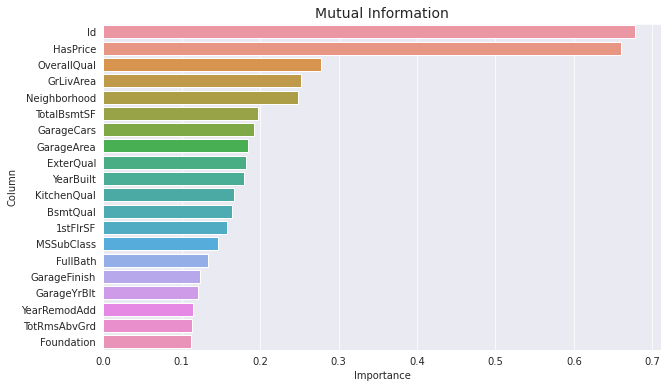

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(scores.values[:20], scores.index[:20])
plt.title('Mutual Information', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Column')

In [54]:
#The function we will use to get the mean squared error
def get_mae(X_train, X_test, y_train, y_test, model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(preds, y_test)

def get_rmsle(X_train, X_test, y_train, y_test, model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    return np.sqrt(mean_squared_log_error(y_test, preds))

In [55]:
gb = df.groupby('HasPrice')
test, train = [gb.get_group(x) for x in gb.groups]

#Drop HasPrice column because we don't need it anymore
train.drop(columns=['HasPrice'], inplace=True)
test.drop(columns=['HasPrice'], inplace=True)

print('Training dimensions:', train.shape)
print('Test dimensions:', test.shape)

Training dimensions: (1460, 81)
Test dimensions: (1459, 81)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
#These features are ordinal, so we have to convert it to a categorical type
train.MSSubClass = train.MSSubClass.astype('object')
train.OverallQual = train.OverallQual.astype('object')
train.OverallCond = train.OverallCond.astype('object')
test.MSSubClass = test.MSSubClass.astype('object')
test.OverallQual = test.OverallQual.astype('object')
test.OverallCond = test.OverallCond.astype('object')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
#Features we will use for our model
feats = ['OverallQual','GrLivArea','YearBuilt','GarageArea','MSSubClass','1stFlrSF','2ndFlrSF']

X_train = train[feats]
X_test = test[feats]
y_train = train.SalePrice
y_test = test.SalePrice

#Our features contain ordinal data, so they must be encoded
cat_cols = list(X_test.select_dtypes('object').columns)
cat_cols

['OverallQual', 'MSSubClass']

In [58]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_cols_train = pd.DataFrame(ohe.fit_transform(X_train[cat_cols]))
ohe_cols_test = pd.DataFrame(ohe.transform(X_test[cat_cols]))

ohe_cols_train.index = X_train.index
ohe_cols_test.index = X_test.index

num_X_train = X_train.drop(cat_cols, axis=1)
num_X_test = X_test.drop(cat_cols, axis=1)

X_train_encoded = pd.concat([num_X_train,ohe_cols_train], axis=1)
X_test_encoded = pd.concat([num_X_test,ohe_cols_test], axis=1)

In [59]:
#Create model
model = XGBRegressor()

#Obtain MAE
print('Our Mean Absolute Error is:')
mae = get_mae(X_train_encoded,X_test_encoded,y_train,y_test,model)
print('{:.2f}'.format(mae))
print('Our RMSLE is:')
rmsle = get_rmsle(X_train_encoded,X_test_encoded,y_train,y_test,model)
print('{:.2f}'.format(rmsle))

Our Mean Absolute Error is:
180380.36
Our RMSLE is:
12.03


In [60]:
#Obtain predictions
preds = model.predict(X_test_encoded)
output = pd.DataFrame({'ID': X_test_encoded.index + 1461, 'SalePrice': np.round(preds,2)})

In [61]:
#Create CSV file for submission!
output.to_csv('predictions.csv', index=False)
output

,ID,SalePrice
0,1461,145265.187500
1,1462,151643.765625
2,1463,172132.187500
3,1464,179499.875000
4,1465,201999.406250
...,...,...
1454,2915,77098.500000
1455,2916,80694.617188
1456,2917,151996.359375
1457,2918,113928.656250
